In [1]:
# Import the necessary libraries for data manipulation, visualization, and machine learning

# NumPy is used for numerical operations on large, multi-dimensional arrays and matrices.
import numpy as np
# Pandas is used for data manipulation and analysis, providing data structures like DataFrames.
import pandas as pd

# Matplotlib is a plotting library used for creating static, animated, and interactive visualizations.
import matplotlib.pyplot as plt
# Matplotlib style is used to customize the look of the plots.
plt.style.use('fivethirtyeight')

# Seaborn is a statistical data visualization library based on Matplotlib, making it easier to create informative and attractive visualizations.
import seaborn as sns
# NLTK (Natural Language Toolkit) is a library for working with human language data (text processing).
import nltk 
# To ignore warnings that might occur during the execution of the code, making the output cleaner.
import warnings
warnings.filterwarnings('ignore')
# Importing performance metrics from sklearn to evaluate machine learning models:
# accuracy_score - measures the ratio of correctly predicted instances.
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# precision_score - measures the ratio of correctly predicted positive observations to the total predicted positives.
# recall_score - measures the ratio of correctly predicted positive observations to the all observations in actual class.
# f1_score - the weighted average of Precision and Recall.


In [2]:
# Load the dataset from a CSV file and print sample data
file_path = r'C:\Users\khawl\Desktop\5SAE2\PFE\CRM\backend\IA\DATASET\spam.csv'
# Use pandas to read a CSV file from the specified path.
df = pd.read_csv(file_path, encoding='latin-1')  
# The encoding parameter is set to 'latin-1' to properly read characters that are encoded in this format.

# Print the first five rows of the dataset to get an overview of the data.
print(df.head())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [3]:
# Drop the non-relevant unnamed columns from the dataset

# Use the drop() method to remove columns 'Unnamed: 2', 'Unnamed: 3', and 'Unnamed: 4'.
# The axis=1 parameter indicates that we are dropping columns, not rows.
df = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
# Rename the columns 'v1' and 'v2' to 'Category' and 'Text' respectively for better understanding

# Use the rename() method to change the column names:
# 'v1' is renamed to 'Category' (indicating whether the email is spam or not),
# 'v2' is renamed to 'Text' (containing the email content).
df = df.rename(columns={'v1': 'Category', 'v2': 'Text'})
# Print the first five rows of the modified dataset to verify the changes.
print(df.head())

  Category                                               Text
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...


###  Exploratory Data Analysis


In [4]:
# Check the total number of rows in the dataset

# Use the len() function to get the number of rows in the DataFrame.
# Print the total number of rows in the dataset.
total_rows = len(df)  

print(f'the total number of rows in the dataset: {total_rows}')
# Get a descriptive summary of the dataset
# Use the describe() method to generate descriptive statistics of the dataset.
# This includes metrics like count, mean, std deviation, min, max, and quartile values for numeric columns.
descriptive = df.describe()
print(descriptive)
# Create a new column 'Length' to store the length of each email text and plot a histogram to check the distribution

# Use the apply() method to apply the len() function to the 'Text' column.
# This calculates the length of each email text and stores it in a new column 'Length'.
df['Length'] = df['Text'].apply(len)
# Display the first five rows of the modified dataset to verify the changes.
print(df.head())
# Plot the distribution of the data using Plotly Express

# Import Plotly Express for interactive plotting.
import plotly.express as px
# Create a histogram to visualize the distribution of text lengths.
# The 'marginal' parameter adds a rug plot to the histogram for better distribution understanding.
fig = px.histogram(df, x='Length',title='Distribution of  Text Lengths', marginal='rug')

# Update the layout of the plot to add titles to the axes and show the legend.
fig.update_layout(xaxis_title='Length of Email Text', yaxis_title='Frequency')

# Show the plot.

fig.show()  



the total number of rows in the dataset: 5572
       Category                    Text
count      5572                    5572
unique        2                    5169
top         ham  Sorry, I'll call later
freq       4825                      30
  Category                                               Text  Length
0      ham  Go until jurong point, crazy.. Available only ...     111
1      ham                      Ok lar... Joking wif u oni...      29
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...     155
3      ham  U dun say so early hor... U c already then say...      49
4      ham  Nah I don't think he goes to usf, he lives aro...      61


In [5]:
# Import necessary modules from scikit-learn

# CountVectorizer is used to convert a collection of text documents to a matrix of token counts (bag-of-words model).
from sklearn.feature_extraction.text import CountVectorizer

# train_test_split is used to split arrays or matrices into random train and test subsets.
from sklearn.model_selection import train_test_split
# Convert the text data into a bag-of-words model using CountVectorizer
vectorizer = CountVectorizer()
# Initialize CountVectorizer, which will tokenize the text and build a vocabulary of known words.

# Fit the CountVectorizer to the text data and transform it into a matrix of token counts.
X = vectorizer.fit_transform(df['Text'])
# Split the data into training and testing sets

# Use train_test_split to split the data into training and testing sets.
# 'text' contains the features (token counts) and 'df['Category']' contains the labels (spam or not spam).
# 'test_size=0.30' specifies that 30% of the data should be used for testing and 70% for training.
# 'random_state=100' ensures the split is reproducible.

X_train, X_test, y_train, y_test = train_test_split(X, df['Category'], test_size=0.30, random_state=100)
# Print the dimensions of the training and testing datasets

# Display the shape of the training feature set.

# Display the shape of the testing feature set.

# Display the shape of the training labels.

# Display the shape of the testing labelds.
print(f'Display the shape of the training feature set.: {X_train.shape}')
print(f'Display the shape of the testing feature set: {X_test.shape}')
print(f'Display the shape of the training labels.: {y_train.shape}')
print(f'Display the shape of the testing labelds: {y_test.shape}')



Display the shape of the training feature set.: (3900, 8672)
Display the shape of the testing feature set: (1672, 8672)
Display the shape of the training labels.: (3900,)
Display the shape of the testing labelds: (1672,)


In [6]:
from sklearn.neural_network import MLPClassifier
import time


start_time = time.time()
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=100)

mlp_classifier.fit(X_train, y_train)
y_pred = mlp_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)#56/60 0.9
precision = precision_score(y_test, y_pred, average='binary', pos_label='spam') #12/1200 0.001
recall = recall_score(y_test, y_pred, average='binary', pos_label='spam')#15/1500 0.0001
f1 = f1_score(y_test, y_pred, average='binary', pos_label='spam')#2/0.00001 200000
end_time = time.time()
cpu_time = end_time - start_time

# Print the results in a formatted manner
print("MLP Classifier")
print(f"Accuracy score: {accuracy:.2f}")
print(f"Precision score: {precision:.2f}")
print(f"Recall score: {recall:.2f}")
print(f"F1 score: {f1:.2f}")
print(f"CPU times: {cpu_time:.2f} s")

MLP Classifier
Accuracy score: 0.99
Precision score: 0.97
Recall score: 0.91
F1 score: 0.94
CPU times: 28.85 s


In [7]:
from sklearn.naive_bayes import MultinomialNB



start_time = time.time()

multinomial_nb_model  = MultinomialNB()

multinomial_nb_model .fit(X_train, y_train)

prediction = multinomial_nb_model.predict(X_test)

accuracy = accuracy_score(y_test, prediction)
precision = precision_score(y_test, prediction, average='binary', pos_label='spam')  
recall = recall_score(y_test, prediction, average='binary', pos_label='spam')
f1 = f1_score(y_test, prediction, average='binary', pos_label='spam')

end_time = time.time()
cpu_time = end_time - start_time

# Afficher les résultats dans un format souhaité
print("Multinomial NB")
print("Accuracy score: {:.16f}".format(accuracy))
print("Precision score: {:.16f}".format(precision))
print("Recall score: {:.16f}".format(recall))
print("F1 score: {:.16f}".format(f1))
print(f"CPU times: user {cpu_time:.2f} s")

Multinomial NB
Accuracy score: 0.9814593301435407
Precision score: 0.9174311926605505
Recall score: 0.9389671361502347
F1 score: 0.9280742459396751
CPU times: user 0.04 s


In [8]:
from sklearn.naive_bayes import BernoulliNB

# Créer et entraîner le modèle Bernoulli Naive Bayes
bernoulli_nb = BernoulliNB()
bernoulli_nb.fit(X_train, y_train)

# Faire des prédictions sur le jeu de test
y_pred = bernoulli_nb.predict(X_test)

# Évaluer et imprimer les métriques de classification
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary', pos_label='spam')
recall = recall_score(y_test, y_pred, average='binary', pos_label='spam')
f1 = f1_score(y_test, y_pred, average='binary', pos_label='spam')

end_time = time.time()
cpu_time = end_time - start_time

# Afficher les résultats dans un format formaté avec la précision souhaitée
print("Bernoulli NB")
print(f"Accuracy score: {accuracy:.16f}")
print(f"Precision score: {precision:.16f}")
print(f"Recall score: {recall:.16f}")
print(f"F1 score: {f1:.16f}")
print(f"CPU times: user {cpu_time * 1000:.1f} ms")

Bernoulli NB
Accuracy score: 0.9838516746411483
Precision score: 1.0000000000000000
Recall score: 0.8732394366197183
F1 score: 0.9323308270676691
CPU times: user 126.5 ms


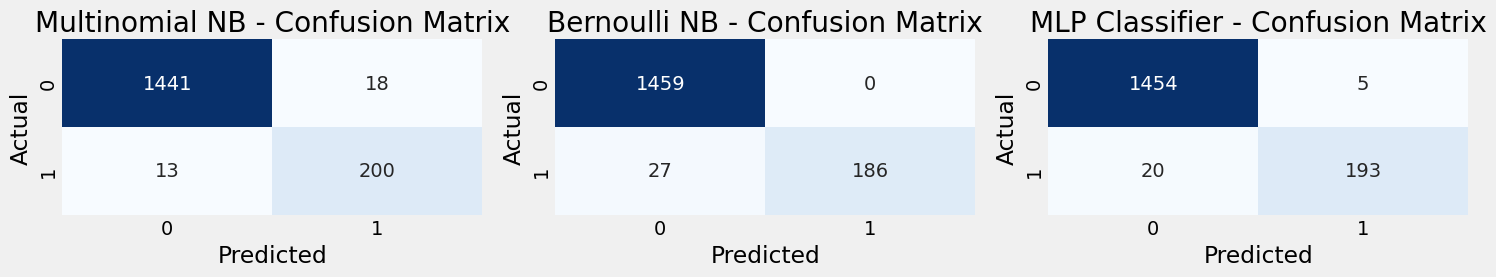

In [9]:
# Confusion Matrix Subplot for 3 Models
## We need to import confusion_matrix from sklearn.metrics

# Define the models to evaluate
models = [("Multinomial NB", multinomial_nb_model), ("Bernoulli NB", bernoulli_nb), ("MLP Classifier", mlp_classifier)]

# Create subplots for confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(15, 3))

# Loop through each model and plot its confusion matrix
for i, (model_name, model) in enumerate(models):
    ## Make predictions using the model
    prediction = model.predict(X_test)
    
    ## Calculate the confusion matrix
    cm = confusion_matrix(y_test, prediction)
    
    ## Plot the confusion matrix as a heatmap
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[i])
    
    ## Set titles and labels for the plot
    axes[i].set_title(f"{model_name} - Confusion Matrix")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


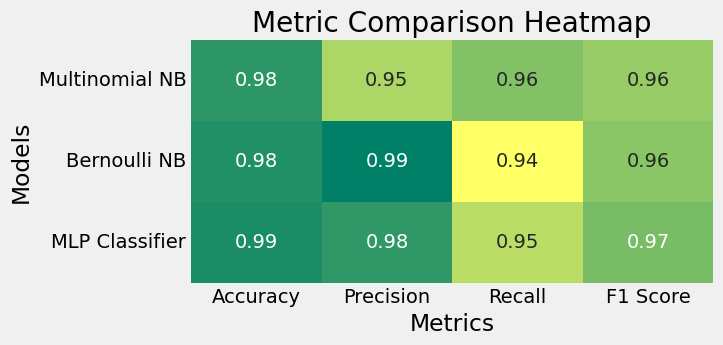

In [10]:

# Collect metrics for each model
metric_data = []
for model_name, model in models:
    # Make predictions using the model
    prediction = model.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, prediction)
    precision = precision_score(y_test, prediction, average='macro')
    recall = recall_score(y_test, prediction, average='macro')
    f1 = f1_score(y_test, prediction, average='macro')
    
    # Append metrics to the data list
    metric_data.append([accuracy, precision, recall, f1])

# Define metric labels
metric_labels = ["Accuracy", "Precision", "Recall", "F1 Score"]

# Create a heatmap for metric comparison
plt.figure(figsize=(6, 3))

# Plot the heatmap
sns.heatmap(metric_data, annot=True, fmt=".2f", cbar=False, cmap="summer_r", 
            xticklabels=metric_labels, yticklabels=[model_name for model_name, _ in models])

# Set titles and labels for the plot
plt.title("Metric Comparison Heatmap")
plt.xlabel("Metrics")
plt.ylabel("Models")
plt.show()